In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [2]:
features = ['Card 1 Suit','Card 1 Rank','Card 2 Suit','Card 2 Rank','Card 3 Suit','Card 3 Rank','Card 4 Suit','Card 4 Rank','Card 5 Suit','Card 5 Rank','Poker Hand']
train_data = pd.read_csv('E:\Projects\Poker Hand Prediction using K-Mean clustering\poker-hand-training-true.data',sep = ',',names = features)
test_data = pd.read_csv('E:\Projects\Poker Hand Prediction using K-Mean clustering\poker-hand-testing.data',sep = ',',names = features)

data = pd.concat([train_data,test_data])

In [3]:
numericalVariableList = ['Card 1 Suit','Card 1 Rank','Card 2 Suit','Card 2 Rank','Card 3 Suit','Card 3 Rank','Card 4 Suit','Card 4 Rank','Card 5 Suit','Card 5 Rank','Poker Hand']
for var in numericalVariableList:
    data[var] = data[var].astype('float64')

In [4]:
clusters = range(1,11)
meandist = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(data)
    clusassign =  model.predict(data)
    meandist.append(sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'),axis = 1))/data.shape[0])

Text(0.5, 1.0, 'Selecting K with elbow method')

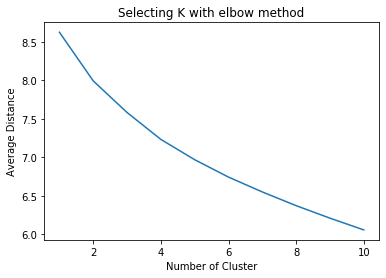

In [5]:
plt.plot(clusters,meandist)
plt.xlabel('Number of Cluster')
plt.ylabel('Average Distance')
plt.title('Selecting K with elbow method')

In [7]:
mode2Cluster = KMeans(n_clusters=2)
mode2Cluster.fit(data)
preds = mode2Cluster.predict(data)

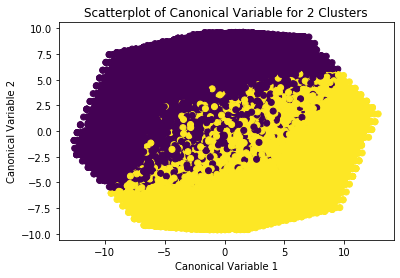

In [8]:
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(data)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1],c = mode2Cluster.labels_,)
plt.xlabel('Canonical Variable 1')
plt.ylabel('Canonical Variable 2')
plt.title('Scatterplot of Canonical Variable for 2 Clusters')
plt.show()